# Texture Classification

Gargeya Sharma - 220278025 - MSc Artificial Intelligence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["image.cmap"] = 'gray'
plt.rcParams["figure.dpi"] = 100

In [2]:
img = plt.imread("../Dataset/DatasetA/face-3.jpg")

# a.)

In [3]:
def ICV_convert_to_gray(image):
    image = (0.3*image[:,:,0]+0.59*image[:,:,1]+0.11*image[:,:,2])/3
    return image

In [4]:
img = ICV_convert_to_gray(img)

In [5]:
img.shape

(256, 256)

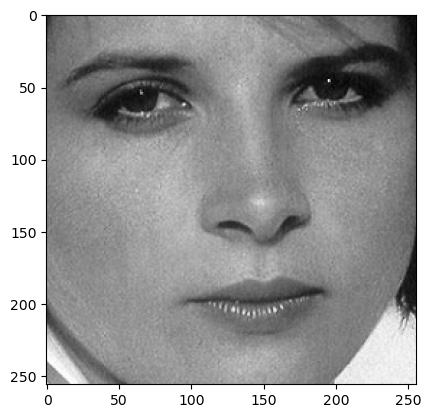

In [6]:
plt.imshow(img)

In [7]:
def ICV_circular_flatten_minus_middle(matrix):
    temp = np.array([], dtype=int)
    middle = matrix[1,1]
    temp = np.append(temp, matrix[0])
    temp = np.append(temp, matrix[1,2])
    temp = np.append(temp, list(reversed(matrix[2].tolist())))
    temp = np.append(temp, matrix[1,0])
    return temp, middle

In [8]:
def ICV_to_binary(nparray, middle):
    ## Replace np.array() with nparray
    temp = list(map(int,(middle <= nparray)))
    # print(temp)
    return int("".join(list(map(str,temp))),2)

In [9]:
def ICV_window_zero_pad(window):
    dimy, dimx = window.shape
    temp = np.vstack((np.zeros((1,dimx)), window, np.zeros((1,dimx))))
    temp = np.hstack((np.zeros((dimy+2,1)), temp, np.zeros((dimy+2,1))))
    return temp

In [10]:
## Testing the function
ICV_window_zero_pad(np.ones((20,10)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1.,

In [11]:
def ICV_LBP_operator(padded_window):
    y_axis, x_axis = padded_window.shape
    k_size = 3
    
    output = np.zeros((y_axis-2, x_axis-2))
    
    for j in range(0, (y_axis-k_size+1)):
        for i in range(0, x_axis-k_size+1):
            
            bin_array, middle = ICV_circular_flatten_minus_middle(padded_window[j:j+k_size, i:i+k_size])
            output[j,i] = ICV_to_binary(bin_array, middle)
    
    return output

In [12]:
def ICV_count(array):
    """
    Count the Number of instances for each value in the array and 
    store it as key value pair {pixel value: Number of such values in the array}
    """
    array = array.flatten()
    freq = {}
    for i in array:
        if i in freq.keys():
            freq[i]+=1
        else:
            freq[i] = 1
    return freq

In [13]:
def ICV_hist_values(counter_dict,BIN_SIZE=256, normalize=True):
    """
    Create a dictionary with key values as range of bins and values as the frequency of pixel having values in that bin-range
    Number of Bins to create can be adjusted by the argument: BIN_SIZE
    """
    d = dict()
    bins = np.linspace(0,255,BIN_SIZE)
    for i in range(1, BIN_SIZE):
        r = str(bins[i-1])+"-"+str(bins[i])
        d[r] = 0
        for px, times in counter_dict.items():
            if bins[i-1] <= px < bins[i]:
                d[r] = d[r] + times
    ## Because Upper limit is not included in the count, last value in the range would be left out
    ## So, I am explicility adding the count of 255 pixel value iff it exists in comuter_dict in the first place.
    if 255 in counter_dict.keys():
        d[r] = d[r] + counter_dict[255]
    
    if normalize:
            new = {}
            for k,v in zip(d.keys(),np.array(list(d.values()))/np.sum(np.array(list(d.values())))):
                new[k] = v
    return new

In [14]:
def ICV_choices_of_best_window_sizes(image):
    
    ## This will raise an Assertion Error if the Image is not Square
    assert image.shape[0] == image.shape[1], print("We require Square image")
    shape = image.shape[0]
    print(f"The factors of {shape} are:")
    poss_val = []
    for i in range(1, shape + 1):
        if shape % i == 0:
            poss_val.append(i)
    print(poss_val)
    window_size = input("Select you value: ")
    return int(window_size)

In [15]:
ICV_choices_of_best_window_sizes(img)

The factors of 256 are:
[1, 2, 4, 8, 16, 32, 64, 128, 256]


Select you value:  16


16

In [16]:
def ICV_divide_into_windows(image, window_size):
    container = []
    for j, j1 in enumerate(range(1,image.shape[0]//window_size+1)):
        for i, i1 in enumerate(range(1,image.shape[0]//window_size+1)):
            temp = image[j*window_size:j1*window_size, i*window_size:i1*window_size]
            container.append(temp)
    return np.array(container)

In [17]:
c = ICV_divide_into_windows(img, 32)
c.shape

(64, 32, 32)

In [18]:
## Checking if the Window is dividing the image in correct number of portions
c.shape[0] == int(img.shape[0]/32)**2

True

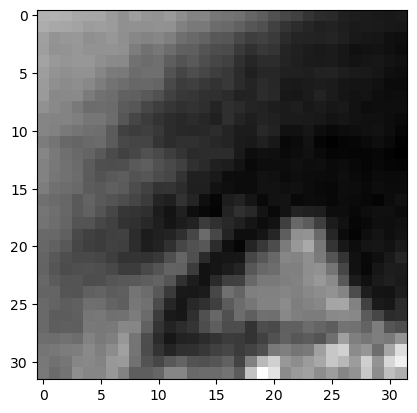

In [19]:
plt.imshow(c[13])

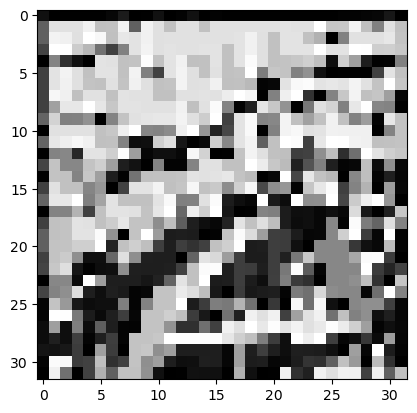

In [20]:
plt.imshow(ICV_LBP_operator(ICV_window_zero_pad(c[13])))

In [21]:
## Checking if the Window Size and After LBP size are same
ICV_LBP_operator(ICV_window_zero_pad(c[13])).shape == c[13].shape

True

In [22]:
values = ICV_hist_values(ICV_count(ICV_LBP_operator(ICV_window_zero_pad(c[0]))))

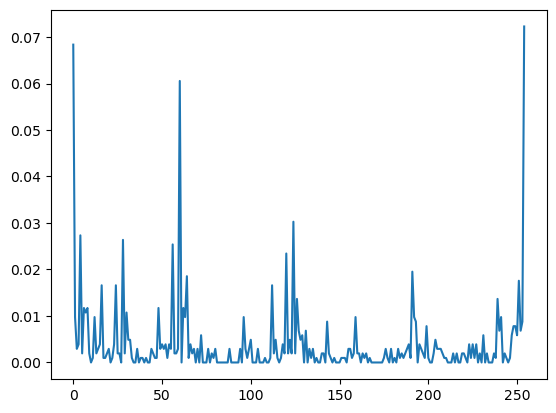

In [23]:
plt.plot(values.values())

# b.)

In [24]:
def ICV_Window_LBP(img, window_size=32):
    """Convert an Image into a collection of 'n' histograms of LBP values
    where 'n' is the number of windows created from that image
    
    set_window: Enable Runtime window-size selection
    """
    img = ICV_convert_to_gray(img)
    
    print(f"\nWindow Size Selected: {window_size} \n")
    c = ICV_divide_into_windows(img, window_size)
    all_window_LBP = np.array(list(map(lambda x: ICV_LBP_operator(ICV_window_zero_pad(x)), c)))
    all_LBP_hist = np.array(list(map(lambda x: np.array(list(ICV_hist_values(ICV_count(x)).values())), all_window_LBP)))
    return all_window_LBP, all_LBP_hist

In [25]:
face1 = plt.imread("../Dataset/DatasetA/face-1.jpg")
car1 = plt.imread("../Dataset/DatasetA/car-1.jpg")
face2 = plt.imread("../Dataset/DatasetA/face-3.jpg")
car2 = plt.imread("../Dataset/DatasetA/car-2.jpg")

In [26]:
face1_a,face1_b = ICV_Window_LBP(face1)
car1_a,car1_b = ICV_Window_LBP(car1)
face2_a,face2_b = ICV_Window_LBP(face2)
car2_a,car2_b = ICV_Window_LBP(car2)


Window Size Selected: 32 


Window Size Selected: 32 


Window Size Selected: 32 


Window Size Selected: 32 



In [27]:
face1_a.shape

(64, 32, 32)

In [28]:
car1_a.shape

(64, 32, 32)

### Global Descriptor Using Histogram Concatenation

Critical Analysis mentioned below

In [29]:
## After performing experimentation mentioned below for getting the global descriptor, 
## I finalized my solution with histrogram concatenation

def ICV_get_global_descriptor(img_hist):
    hist_values = np.concatenate(img_hist, axis=0)
    return hist_values/np.sum(hist_values)

In [30]:
face1_global = ICV_get_global_descriptor(face1_b)
face2_global = ICV_get_global_descriptor(face2_b)
car1_global = ICV_get_global_descriptor(car1_b)
car2_global = ICV_get_global_descriptor(car2_b)

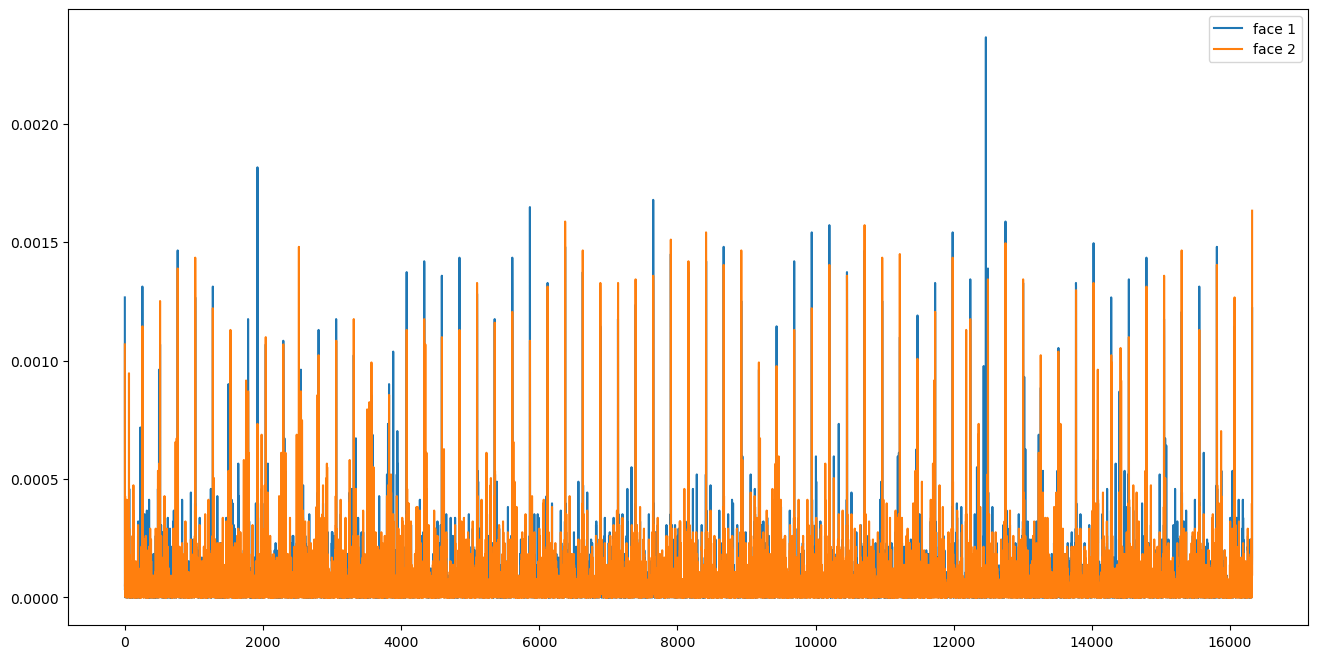

In [31]:
plt.figure(figsize=(16,8))
plt.plot(face1_global, label="face 1")
plt.plot(face2_global, label="face 2")
plt.legend()
plt.show()

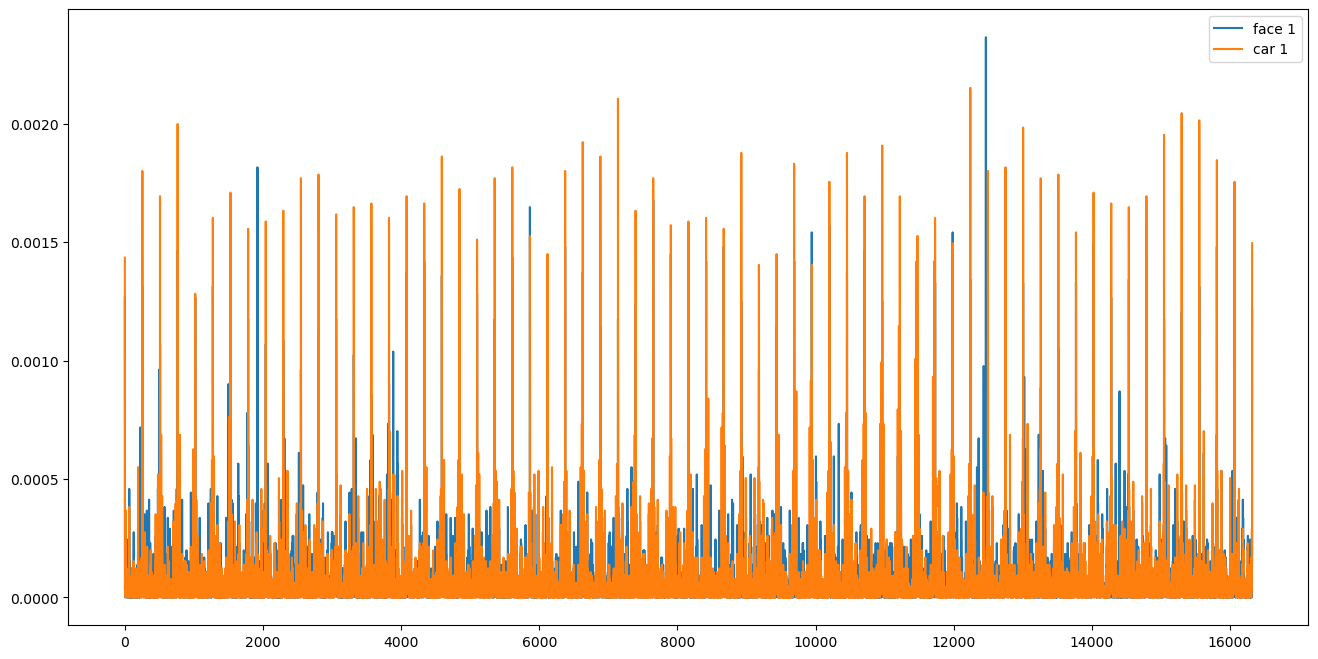

In [32]:
plt.figure(figsize=(16,8))
plt.plot(face1_global, label="face 1")
plt.plot(car1_global, label="car 1")
plt.legend()
plt.show()

### Experimenting different methods of getting a global descriptor

#### 1. Setting Window size as equal as the Image size(Global Single Window)

Manual Input is required, please provide max value **(256)** to select the whole image as the window size

In [33]:
## NOTE: Because all the images have the same dimension, 
## I am calling it outside the ICV_window_LBP function. 
## Otherwise earlier I was calling it inside the function but 
## I didn't want to bother you guys to manually input window_size mulitple times

window_size = ICV_choices_of_best_window_sizes(face1)


face1_aa,face1_bb = ICV_Window_LBP(face1, window_size)
car1_aa,car1_bb = ICV_Window_LBP(car1, window_size)
face2_aa,face2_bb = ICV_Window_LBP(face2, window_size)

The factors of 256 are:
[1, 2, 4, 8, 16, 32, 64, 128, 256]


Select you value:  256



Window Size Selected: 256 


Window Size Selected: 256 


Window Size Selected: 256 



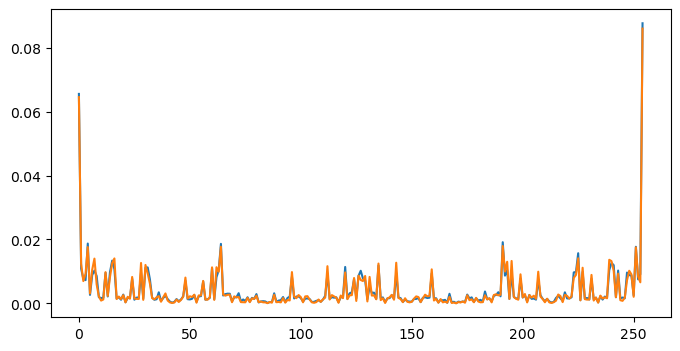

In [34]:
plt.figure(figsize=(8,4))
plt.plot(face1_bb[0])
plt.plot(face2_bb[0])
plt.show()

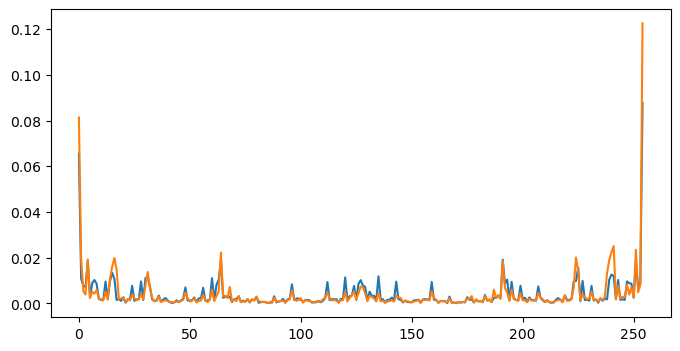

In [35]:
plt.figure(figsize=(8,4))
plt.plot(face1_bb[0])
plt.plot(car1_bb[0])
plt.show()

#### 2. Summing the Histogram frequencies

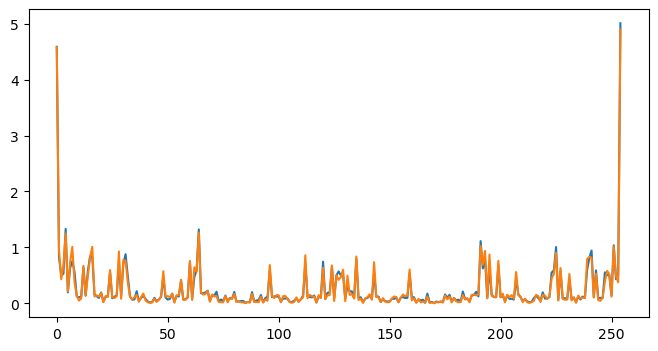

In [36]:
plt.figure(figsize=(8,4))
plt.plot(np.sum(face1_b, axis=0))
plt.plot(np.sum(face2_b, axis=0))

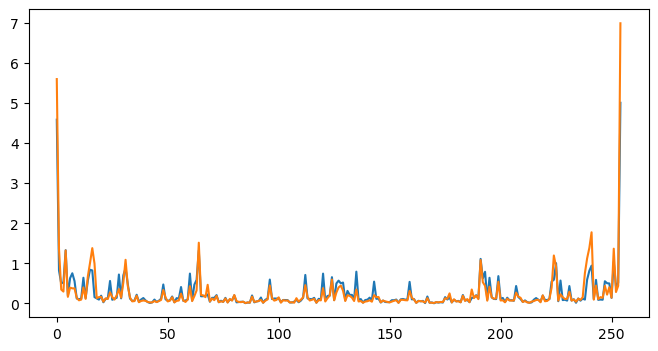

In [37]:
plt.figure(figsize=(8,4))
plt.plot(np.sum(face1_b, axis=0))
plt.plot(np.sum(car1_b, axis=0))

**Analysis:** Both of these methods are giving exactly the same output. Check both of their's histograms

### Classification

Critical Analysis of **6** different metrics to calculate histogram similarities are mentioned below

#### Comparison between the tall bars in histograms
Combination of 2 different histogram similarity methods: **Histogram Intersection** and **Chi-squared Distance**

##### Face Model

In [38]:
face_model = ICV_get_global_descriptor(face1_b)
test_face = ICV_get_global_descriptor(face2_b)
test_car1 = ICV_get_global_descriptor(car1_b)
test_car2 = ICV_get_global_descriptor(car2_b)

In [39]:
def ICV_similarity(model,test):
    # Combination of 2 distances
    intersection = 1-np.average(np.sum(np.minimum(model, test)))
    chisquared = 1/2*(np.sum(((model-test)**2)/(model+test+1e-10)))
    return (intersection+chisquared)/2

In [40]:
ICV_similarity(face_model, test_face)

0.22478324424545104

In [41]:
ICV_similarity(face_model, test_car1)

0.2975468016110472

In [42]:
ICV_similarity(face_model, test_car2)

0.27427936150579635

In [43]:
## Classification Function to check if test image passed in the function is 'face' or 'not a face'
def ICV_classify(test, threshold=0.26):
    model = face_model
    
    ## Changing the window size will change the scale of values so, we need to fine-tune threshold value
    ## And it makes sense to me, because they are totally different representations
    
    similarity = ICV_similarity(model, test)
    if similarity>=threshold:
        print("Not a Face")
    else:
        print("Face")

In [44]:
ICV_classify(test_face)

Face


In [45]:
ICV_classify(test_car1)

Not a Face


In [46]:
ICV_classify(test_car2)

Not a Face


### Other Approaches I tried but didn't work (Critical Analysis)

#### 1. Evaluating similarity over concatenation of window's histograms

In [47]:
def ICV_intersection(freq_1, freq_2):
    return np.average(np.sum(np.minimum(freq_1, freq_2)))

In [48]:
ICV_intersection(face_model, test_face)

0.708251953125

In [49]:
ICV_intersection(face_model, test_car1)

0.6299896240234375

In [50]:
ICV_intersection(face_model, test_car2)

0.653167724609375

#### 2. Evaluting similarities of histogram using my own approach

In [51]:
## Observing the difference of spikes in both their number and magnitude in faces and cars images, 
## I thought of using those spiky values at 0 and 255 pixel values
def ICV_OWN_IDEA(model,freq):
    model_value = []
    freq_value = []
    for i in range(0,len(model), 255):
        model_value.append(model[i])
        model_value.append(model[i+1])
    for i in range(0,len(model), 255):
        freq_value.append(freq[i])
        freq_value.append(freq[i+1])
    return np.sum(np.array(model_value)-np.array(freq_value))

In [52]:
ICV_OWN_IDEA(face_model, test_face)

-0.001953125

In [53]:
ICV_OWN_IDEA(face_model, test_car1)

-0.0242156982421875

In [54]:
ICV_OWN_IDEA(face_model, test_car2)

-0.0079193115234375

#### 3. Evaluating similarity of histogram using Chi-Squared distance

In [55]:
def ICV_chisquared(model, test):
    ## Using Chi squared Distance
    return 1/2*(np.sum(((model-test)**2)/(model+test+1e-10)))

In [56]:
ICV_chisquared(face_model, test_face)

0.15781844161590208

In [57]:
ICV_chisquared(face_model, test_car1)

0.22508322724553181

In [58]:
ICV_chisquared(face_model, test_car2)

0.20172644762096775

#### 4. Evaluating similarity using Jaccard Distance

In [59]:
def ICV_jaccard_distance(model,test):
    return 1- (np.sum(np.minimum(model, test))/np.sum(np.maximum(model, test)))

In [60]:
ICV_jaccard_distance(face_model,test_face)

0.45171045171045177

In [61]:
ICV_jaccard_distance(face_model,test_car1)

0.5401570418221306

In [62]:
ICV_jaccard_distance(face_model,test_car2)

0.5150341014660231

#### 5. Evaluating similarity using Kolmogorov Smirnov Distance

In [63]:
def ICV_kolmogorov_smirnov(model, test):
    return np.max(model - test)

In [64]:
ICV_kolmogorov_smirnov(face_model, test_face)

0.002288818359375

In [65]:
ICV_kolmogorov_smirnov(face_model, test_car1)

0.002288818359375

In [66]:
ICV_kolmogorov_smirnov(face_model, test_car2)

0.00213623046875

#### 6. Evaluating similarity using Cosine Distance

In [67]:
def ICV_cosine(model, test):
    return 1-np.sum(model*test)

In [68]:
ICV_cosine(face_model, test_face)

0.999701194697991

In [69]:
ICV_cosine(face_model, test_car1)

0.999664326896891

In [70]:
ICV_cosine(face_model, test_car2)

0.9996737570036203

# c.)

In [71]:
## Set window size to 16 (Lowering it from above case: 32)

window_size = ICV_choices_of_best_window_sizes(face1)

face1t_a,face1t_b = ICV_Window_LBP(face1, window_size)
car1t_a,car1t_b = ICV_Window_LBP(car1, window_size)
face2t_a,face2t_b = ICV_Window_LBP(face2, window_size)
car2t_a,car2t_b = ICV_Window_LBP(car2, window_size)

The factors of 256 are:
[1, 2, 4, 8, 16, 32, 64, 128, 256]


Select you value:  16



Window Size Selected: 16 


Window Size Selected: 16 


Window Size Selected: 16 


Window Size Selected: 16 



In [72]:
face_model = ICV_get_global_descriptor(face1t_b)
test_face = ICV_get_global_descriptor(face2t_b)
test_car1 = ICV_get_global_descriptor(car1t_b)
test_car2 = ICV_get_global_descriptor(car2t_b)

In [73]:
ICV_similarity(face_model, test_face)

0.39363292856971943

In [74]:
ICV_similarity(face_model, test_car1)

0.4444553216450239

In [75]:
ICV_similarity(face_model, test_car2)

0.43569329234132564

In [76]:
ICV_classify(test_face, threshold=0.4)

Face


In [77]:
ICV_classify(test_car1, threshold=0.4)

Not a Face


In [78]:
ICV_classify(test_car2, threshold=0.4)

Not a Face


**Analysis:** Without changing the threshold value, This can easily fail because with different window size, our LBP values as well as number of windows are changing. This change is completely drastic and new histograms are no longer similar in behavior those of previous window size. So the scale of their histogram similarities values are also not standard. A single threshold is not able to perform classification for all the window size. This is what I conclude from my 7 experiments done in this notebook.

# d.)

In [79]:
## Set window size to 64 (Increasing it from above case: 32)

window_size = ICV_choices_of_best_window_sizes(face1)

face1t_a,face1t_b = ICV_Window_LBP(face1, window_size)
car1t_a,car1t_b = ICV_Window_LBP(car1, window_size)
face2t_a,face2t_b = ICV_Window_LBP(face2, window_size)
car2t_a,car2t_b = ICV_Window_LBP(car2, window_size)

The factors of 256 are:
[1, 2, 4, 8, 16, 32, 64, 128, 256]


Select you value:  64



Window Size Selected: 64 


Window Size Selected: 64 


Window Size Selected: 64 


Window Size Selected: 64 



In [80]:
face_model = ICV_get_global_descriptor(face1t_b)
test_face = ICV_get_global_descriptor(face2t_b)
test_car1 = ICV_get_global_descriptor(car1t_b)
test_car2 = ICV_get_global_descriptor(car2t_b)

In [81]:
ICV_similarity(face_model, test_face)

0.12624019167606518

In [82]:
ICV_similarity(face_model, test_car1)

0.20644490869172877

In [83]:
ICV_similarity(face_model, test_car2)

0.17354436541811039

In [84]:
ICV_classify(test_face, threshold=0.14)

Face


In [85]:
ICV_classify(test_car1, threshold=0.14)

Not a Face


In [86]:
ICV_classify(test_car2, threshold=0.14)

Not a Face


---